In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

versions = cartesian_product(np.array([0.2,1,5]), np.array([0.2, 1, 5]), np.array([1/10, 1/3, 1, 3]))

prefixes_tenth = []
prefixes_third = []
prefixes_unit = []
prefixes_triple = [] 
prefixes = [prefixes_tenth, prefixes_third, prefixes_unit, prefixes_triple]
for A in versions:
    a_1 = A[0]
    Mp = 4 if A[1] == 5 else A[1]
    Zgrfactor = A[2]
    ind = [0.1, 0.33333333, 1, 3].index(Zgrfactor)
    prefixes[ind].append("{}_{}_{}_".format(a_1, Mp, Zgrfactor))

names0 = ['grad', 'grad_rad', 'Tstop', 'Tgrow', 'Tsettl', 'Zgr', 'kappa_gr', 'size',
        'rho_gas_cbrt', 'Temperature', 'Press', 'rho_gas_norm', 'Temperature_norm',
        'Env', 'grad_mu', 'grad_ad', 'grad_diff', 'log10(R_0)', 'lambda_mfp', 'c_gas',
        'nu_visc', 'xi_rad', 'kappa_tot', 'Tfourth', 'rho_gas', 'Prandtl_number', 
         'tau_opt', 'Ledoux']

names = ['N'+name for name in names0]

styles = ['r-', 'r--', 'r:', 'g-', 'g--', 'g:', 'b-', 'b--', 'b:']

log_scale = [1 if names0[i]=='Tsettl' or names0[i]=='Zgr' or names0[i]=='kappa_gr' or names0[i]=='size' 
      or names0[i]=='rho_gas_cbrt' or names0[i]=='Temperature' or names0[i]=='Press' or
      names0[i]=='rho_gas_norm' else 0 for i in range(len(names0))]

log_name = ['(log10)' if names0[i]=='log10(R_0)' or names0[i]=='lambda_mfp' or names0[i]=='c_gas'
           or names0[i]=='nu_visc' or names0[i]=='xi_rad' or names0[i]=='kappa_tot' or names0[i]=='Tfourth'
           or names0[i] == 'rho_gas' or names0[i]=='Prandtl_number' or names0[i]=='tau_opt' 
           else '' for i in range(len(names0))]

def plot_versions(n, prefixes):
    name = names[n]
    i=0
    for prefix in prefixes:
        R = np.loadtxt('iterator/saved/'+prefix+'R.txt')
        var = np.loadtxt('iterator/saved/'+prefix+name+'.txt')
        plt.plot(R, var, styles[i], label=prefix.split('_')[0]+'Au '+prefix.split('_')[1]
                +'Earth Mass')
        plt.plot([R[0], R[-1]], [var[0], var[-1]], styles[i][0]+'o', markersize=4)
        i+=1
    if log_scale[n]==1:
        plt.yscale('log')
    plt.grid()
    plt.title(name+log_name[n])
    plt.legend()

Solid, Dashed, Dotted line = 0.2, 1, 5 Earth Mass

Red, Green, Blue = 0.2, 1, 5 AU

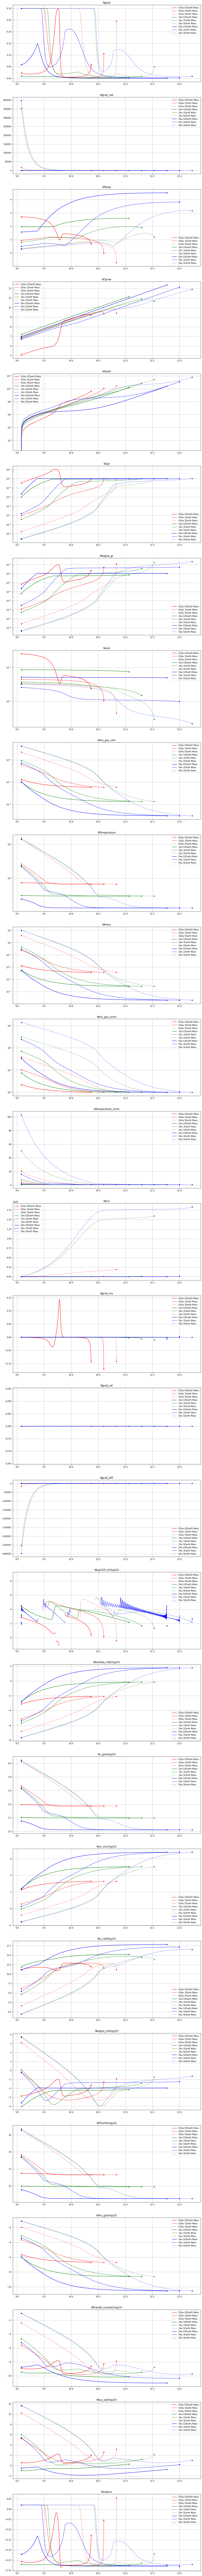

In [2]:
n = len(names)
plt.figure(figsize=(16, 8*n))
for i in range(n):
    plt.subplot(n,1,i+1)
    plot_versions(i,prefixes[0])

In [ ]:
plt.figure(figsize=(16, 8*n))
for i in range(n):
    plt.subplot(n,1,i+1)
    plot_versions(i,prefixes[1])

In [ ]:
plt.figure(figsize=(16, 8*n))
for i in range(n):
    plt.subplot(n,1,i+1)
    plot_versions(i,prefixes[2])

In [ ]:
plt.figure(figsize=(16, 8*n))
for i in range(n):
    plt.subplot(n,1,i+1)
    plot_versions(i,prefixes[3])